In [113]:
import pandas as pd
import matplotlib.pyplot as plt

In [114]:
df = pd.read_csv('./data/monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)


/home/as/PycharmProjects/SF/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: FutureWarning: In a future version of pandas all arguments of read_csv except for the argument 'filepath_or_buffer' will be keyword-only
  exec(code_obj, self.user_global_ns, self.user_ns)


In [115]:
df

,milk
month,
1962-01-01,589
1962-02-01,561
1962-03-01,640
1962-04-01,656
1962-05-01,727
...,...
1975-08-01,858
1975-09-01,817
1975-10-01,827


<AxesSubplot:xlabel='month'>

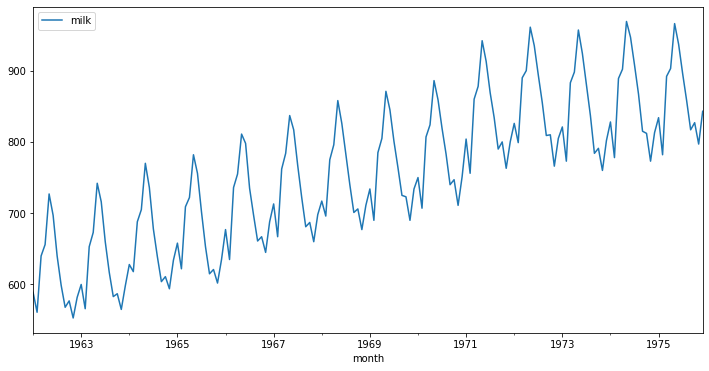

In [116]:
df.plot(figsize=(12,6))

In [117]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(df)


(-1.3038115874221246,
 0.627426708603034,
 13,
 154,
 {'1%': -3.473542528196209,
  '5%': -2.880497674144038,
  '10%': -2.576878053634677},
 1115.1730447395112)

In [118]:
'''milk = pd.read_csv('data/monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
milk['adjmilk'] = milk.milk / milk.index.days_in_month
print sum(milk.adjmilk)'''

'''
milk = pd.read_csv('data/monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)
from calendar import monthrange
milk['adjmilk'] = [float(milk.milk / monthrange(i.year, i.month)[1]) for i in milk.index]
print sum(milk.adjmilk)
'''

"\nmilk = pd.read_csv('data/monthly-milk-production.csv',';', index_col=['month'], parse_dates=['month'], dayfirst=True)\nfrom calendar import monthrange\nmilk['adjmilk'] = [float(milk.milk / monthrange(i.year, i.month)[1]) for i in milk.index]\nprint sum(milk.adjmilk)\n"

In [119]:
#Дневной надой
df['daily'] = df.milk/df.index.days_in_month

Вопрос 7
Для ряда со средним дневным количеством молока на корову из предыдущего вопроса давайте с помощью критерия Дики-Фуллера подберём порядок дифференцирования, при котором ряд становится стационарным.

Дифференцирование можно делать так:
milk.daily_diff1 = milk.daily - milk.daily.shift(1)


In [120]:
#1_Дифференцирование
df['daily_diff1'] = df.daily - df.daily.shift(1)

In [121]:
#2_Дифференцирование
df['daily_diff12'] = df.daily_diff1- df.daily_diff1 .shift(12)
df.daily_diff12

month
1962-01-01         NaN
1962-02-01         NaN
1962-03-01         NaN
1962-04-01         NaN
1962-05-01         NaN
                ...   
1975-08-01    0.096774
1975-09-01    0.356989
1975-10-01    0.417204
1975-11-01    0.316129
1975-12-01    0.167742
Name: daily_diff12, Length: 168, dtype: float64

<AxesSubplot:xlabel='month'>

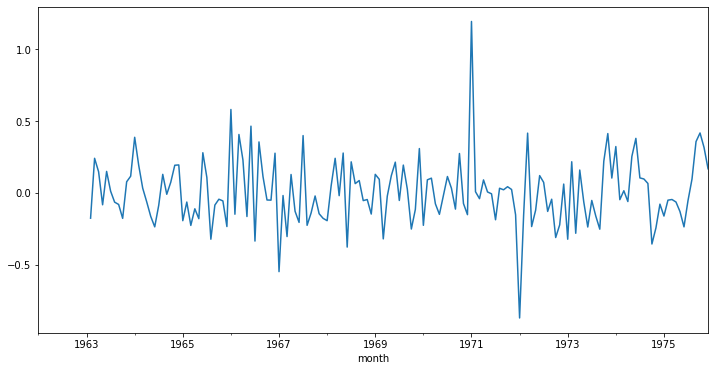

In [122]:
df.daily_diff12.plot(figsize=(12,6))

критерий Дики-Фуллера. Это делается так:

In [123]:
import statsmodels.api as sm
sm.tsa.stattools.adfuller(df.daily_diff12[13:])

(-5.481326334796926,
 2.2808455518037347e-06,
 11,
 143,
 {'1%': -3.4769274060112707,
  '5%': -2.8819726324025625,
  '10%': -2.577665408088415},
 -20.905137509892256)

Вопрос 8

Для стационарного ряда из предыдущего вопроса (продифференцированного столько раз, сколько вы посчитали нужным) постройте график автокорреляционной функции. Это можно cделать так:


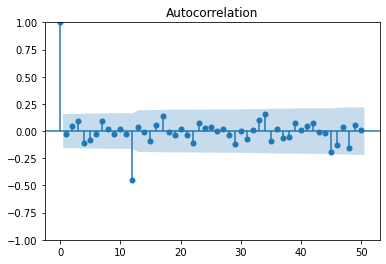

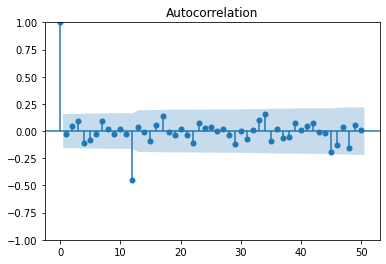

In [124]:
import statsmodels.api as sm
sm.graphics.tsa.plot_acf(df.daily_diff12[13:].values.squeeze(), lags=50)

/home/as/PycharmProjects/SF/venv/lib/python3.8/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


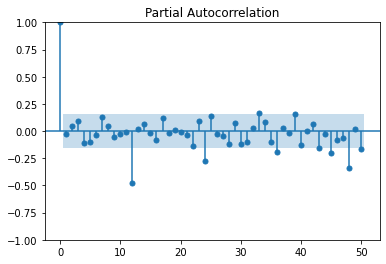

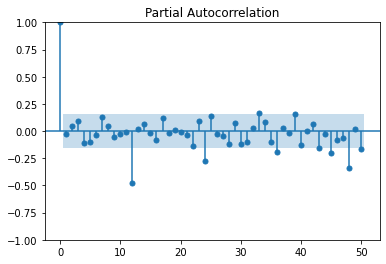

In [125]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(df.daily_diff12[13:].values.squeeze(), lags=50)
